In [1]:
#### iuimport required libraries.
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#### loading data set.
data = pd.read_csv('C:/Users/arifa/Downloads/Files/Files/german_credit_data.csv')

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
#### clustering works on numerical data.
#### selecting numerical features for analysis.
selected_cols = ['Age','Credit amount','Duration']
cluster_data = data.loc[:,selected_cols]
cluster_data.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


In [6]:
#### defining kmeans clustering.
#### taking cluster=4.
km = KMeans(n_clusters=4)
km.fit(cluster_data)

KMeans(n_clusters=4)

In [7]:
cluster_data.shape

(1000, 3)

In [8]:
cluster_data.head(5)

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


In [10]:
#### predictiing clusters.
pred = km.predict(cluster_data)
pred

array([1, 0, 1, 0, 3, 0, 3, 0, 3, 3, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 0, 1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 3, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 3, 3,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3, 3, 0, 3, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 3, 0, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0,
       3, 1, 2, 1, 0, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 3, 1, 3, 1, 1, 0, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 0,
       3, 1, 1, 1, 0, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 1, 1, 3, 1, 1, 2, 1, 1, 0, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 2, 0, 1, 3, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 3, 1, 3, 1, 1, 1, 3, 3,
       1, 1, 0, 1, 0, 1, 3, 1, 2, 3, 2, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 2,
       3, 0, 1, 1, 1, 0, 0, 3, 0, 2, 3, 1, 1, 3, 1,

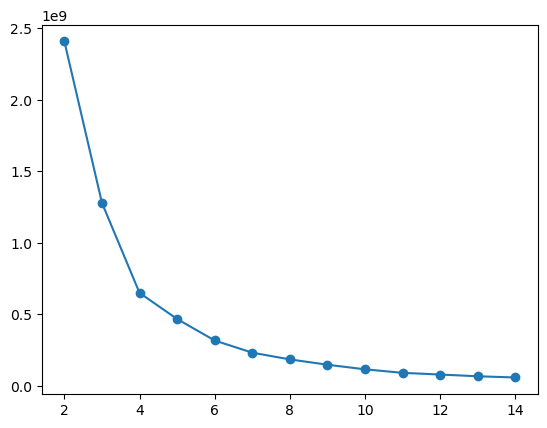

In [11]:
#### how to select the optimal clusters
#### using elbow methode choosing optimal number of cluster for the model.
import matplotlib.pyplot as plt
cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = [] ###variances
for c in cluster_range:
    kmeans =  KMeans(n_clusters=c,random_state=0,).fit(cluster_data)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(cluster_range,inertias,marker = 'o')
plt.show()

In [12]:
#### adding predicted clusters as cluster.
cluster_data['cluster']= pred
cluster_data

,Age,Credit amount,Duration,cluster
0,67,1169,6,1
1,22,5951,48,0
2,49,2096,12,1
3,45,7882,42,0
4,53,4870,24,3
...,...,...,...,...
995,31,1736,12,1
996,40,3857,30,3
997,38,804,12,1
998,23,1845,45,1


<AxesSubplot:xlabel='Credit amount', ylabel='Age'>

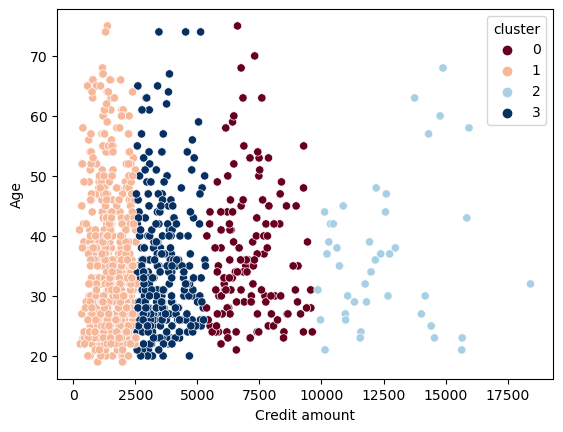

In [13]:
sns.scatterplot(y = 'Age',x = 'Credit amount', hue = 'cluster',data=cluster_data,palette='RdBu')

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

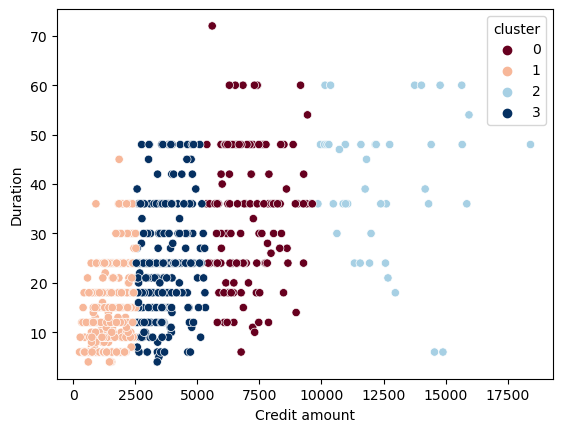

In [14]:
sns.scatterplot(y='Duration',x='Credit amount',hue='cluster',data=cluster_data,palette='RdBu')

In [15]:
#### using hierarchical clustering.
X = cluster_data[['Age','Credit amount','Duration']]
X

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [16]:
from sklearn.cluster import AgglomerativeClustering 

In [17]:
#### taking clusters = 4.
agm =AgglomerativeClustering(n_clusters = 4,linkage = 'single')

In [18]:
#### fitting the model.
agm.fit(X)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [19]:
#### making predictions.
pred_agm = agm.fit_predict(X)
pred_agm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

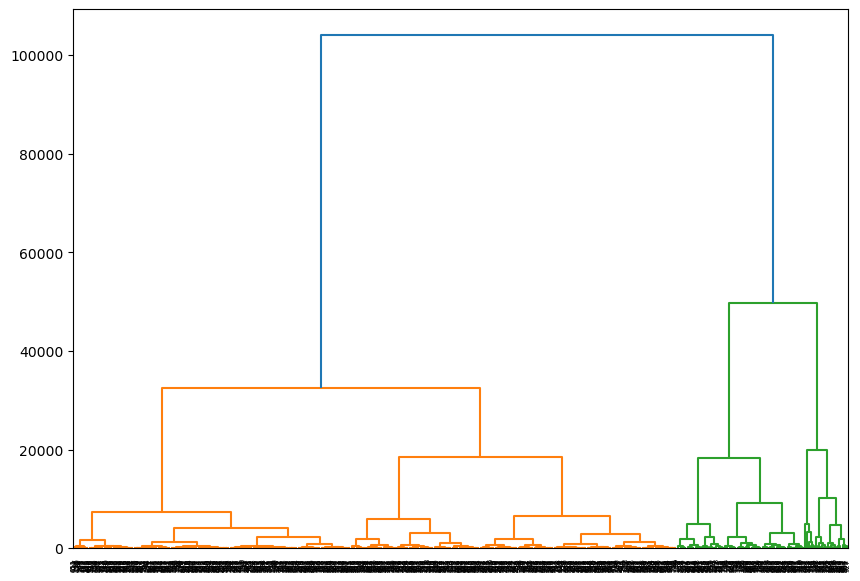

In [20]:
#### ploting dendogram to show the arrangement of the clusters produced by hierarchical clustering. 
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dend = sch.dendrogram(sch.linkage(X,method='ward'))

In [21]:
#### adding predicted cluster as cluster.
X['Cluster']=pred_agm
X

,Age,Credit amount,Duration,Cluster
0,67,1169,6,0
1,22,5951,48,0
2,49,2096,12,0
3,45,7882,42,0
4,53,4870,24,0
...,...,...,...,...
995,31,1736,12,0
996,40,3857,30,0
997,38,804,12,0
998,23,1845,45,0


<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

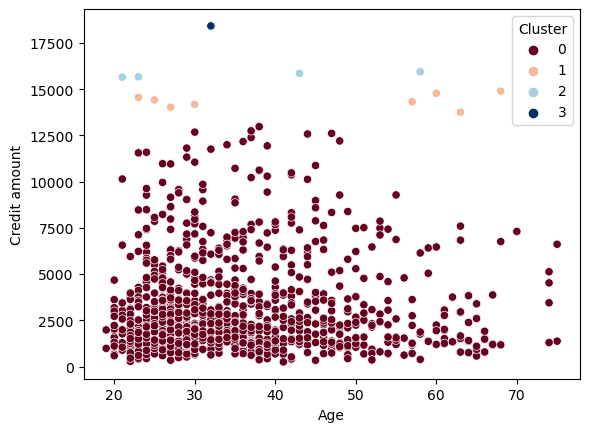

In [22]:
#### using scattered plot to gain insights.
sns.scatterplot(x='Age',y='Credit amount',hue='Cluster',data=X,palette='RdBu')

In [ ]:
#### here from scattered plot we we gained insights that is.
#### peopole off all the ages are prefering credit amount between 2500-5000 is more.
#### Adjusting the loan product offerings or marketing strategies to specifically target individuals within this credit amount range, tailoring the terms and messaging to better meet their needs and preferences.